In [423]:
import cv2
import numpy as np
import utils

# Load the image
image = cv2.imread('images/template_pcb.jpg')
image = utils.rotate_image(image, 45)

In [381]:
# Define the color range for the PCB (green color in BGR format)
lower_green = np.array([0, 35, 0], dtype="uint8")
upper_green = np.array([100, 255, 100], dtype="uint8")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and smoothen the image
blurred = cv2.GaussianBlur(gray, (5, 5), 1)

# Apply Canny edge detection to find edges
edges = cv2.Canny(blurred, 50, 150)

# Combine color-based detection (green) with edge detection
color_mask = cv2.inRange(image, lower_green, upper_green)
combined_mask = cv2.bitwise_or(color_mask, edges)

# Apply morphological operations (e.g., closing) to further process the mask
kernel = np.ones((5, 5), np.uint8)
closed_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

# Find the contours of the PCB in the closed mask
contours, _ = cv2.findContours(closed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to keep track of the largest contour
largest_contour = None
max_contour_area = 0

# Iterate through the contours and hierarchy
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_contour_area:
        max_contour_area = area
        largest_contour = contour

# Draw the largest PCB contour on a copy of the original image
result_image = image.copy()
if largest_contour is not None:
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)
else:
    print("No valid contours found.")

In [424]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and smoothen the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to find edges
edges = cv2.Canny(blurred, 30, 90)  # Adjust the thresholds as needed

# Apply dilation to connect nearby edges and enhance contour detection
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Find the contours of the PCB in the edge-detected image
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to keep track of the largest contour
largest_contour = None
max_contour_area = 0

# Iterate through the contours and hierarchy
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_contour_area:
        max_contour_area = area
        largest_contour = contour

# Calculate the angle of the PCB
if largest_contour is not None:
    rect = cv2.minAreaRect(largest_contour)
    angle = rect[2]
else:
    angle = 0.0  # Default angle if no valid contour is found

# Draw the largest PCB contour on the original image
result_image = image.copy()
if largest_contour is not None:
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)

45.0


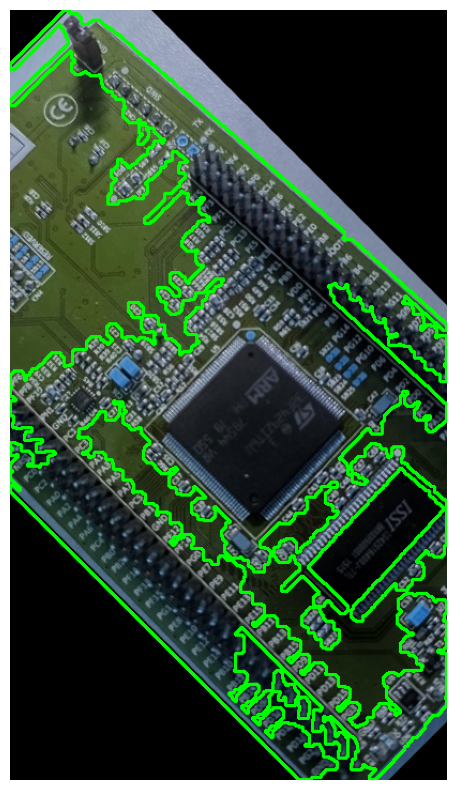

In [425]:
print(angle)
utils.showim([result_image])